# Categorical classification of programming tasks with loops (Python), using deep learning.


In this article, we present a comprehensive methodology for categorizing programming tasks involving loops. Our approach utilizes a dataset consisting of task descriptions paired with corresponding Python code solutions and loop specifications. These loop specifications encompass the initial state, final state, and state transformations. We classify these solutions into four categories, differentiating between correctness and errors in the initialization state, final state, and loop state transformations. Our primary objective is to harness deep learning techniques to construct an integrated representation and learning framework.

The key learning objectives outlined in this proposal include:

- Transforming textual data into vector representations to facilitate the classification of program descriptions containing loops.

- Converting Python source code into vectorized representations.

- Developing a foundational deep learning model that incorporates either LSTM or convolutional neural networks.

- Training the deep learning model until it achieves the desired outcomes and performance levels.

Mount drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Generationdata')

## Part 1.

### 1.1. Installation of libraries and import.

In [ ]:
!pip install transformers

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import shutil
import string
import tensorflow as tf
from keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Input, Dropout, Bidirectional, LSTM, Embedding, BatchNormalization,  Reshape, Conv2D, MaxPool2D, concatenate, Flatten, Activation

### 1.2. Dataset.

To preprocess the data set and load it into a data frame, we will work with a CSV file consisting of five columns. The structure of the CSV file is as follows:

- Column 1: Identification of the programming task with loops.
- Column 2: Description of the problem to be solved.
- Column 3: Python solution provided for the programming task.
- Column 4: Definition of the initial state of the loop, where the initial variable declaration is located.
- Column 5: Definition of the final state of the loop, where the loop condition is defined.
- Column 6: Definition of the loop state transformation or also known as loop body.
- Column 7: Task status. It is denoted as 1 if the solution is correct and 0 if it is incorrect.
- Column 8: State of the task considering error types: Initialization State, Final State and State Transformation.
Column 9: Feedback Generated for Incorrect Exercises.

To load and preprocess the data set into a data frame, we will follow these steps:

- Import the libraries necessary for data manipulation, such as pandas.
- Use the pandas library to read the CSV file into a data frame, assuming the file is called "dataset.csv".

In [ ]:
archivo_3 = '/content/drive/MyDrive/Ginna Tesis/Kernel Function Comparision/DataProgramsandDescriptions-CatRetroalimentacion6000.xlsx'
train_full = pd.read_excel(archivo_3)

In [ ]:
train_full

,No.,Problema,Solución,Estado incial,Estado final,Transformación de estado,Etiqueta 1,Etiqueta 2,Realimentación
0,1.0,Write a Python function that returns the facto...,def factorial(n):\n result = 1\n i = 1\n...,"result = 1, i = 1",i <= n,"result *= i, i += 1",Correct,['Correct'],NaN
1,2.0,Write a Python function that returns the sum o...,def sum_1_to_100():\n total = 0\n i = 1\...,"total = 0, i = 1, n = 100",i <= n,"total += i, i += 1",Correct,['Correct'],NaN
2,3.0,Write a Python function that prints the number...,def print_and_store():\n numbers = []\n ...,"numbers = [], i = 0, n = 10",i <= n,"print(i), numbers.append(i), i += 1",Correct,['Correct'],NaN
3,4.0,Write a Python function to print the numbers f...,def print_and_store_reverse():\n numbers = ...,"numbers = [], i = 10, n = 1",i >= n,"print(i), numbers.append(i), i -= 1",Correct,['Correct'],NaN
4,5.0,Write a Python function to check if a number i...,def is_prime(num):\n if num <= 1:\n ...,"i = 2, i = = 0:",i <= num//2,"if num % i == 0:, return False, i += 1",Correct,['Correct'],NaN
...,...,...,...,...,...,...,...,...,...
6018,NaN,Write a Python function that calculates the ma...,def find_major_minimumor(numbers):\n larges...,"largest = 0, smallest = 0, i = 0, largest = nu...",i > len(numbers),"if numbers[i] > largest:, largest = number...",Incorrect,"['Initial state', 'Final state', 'State transf...",The loop condition while i > len(numbers):...
6019,NaN,Write a Python function that calculates the ma...,def find_major_minimumor(numbers):\n maximu...,"maximum_val = 0, minimum_val = 0, i = 0, maxim...",i > len(numbers),"if numbers[i] > maximum_val:, maximum_val ...",Incorrect,"['Initial state', 'Final state', 'State transf...",The loop condition while i > len(numbers):...
6020,NaN,Write a Python function that calculates the ma...,def find_major_minimumor(numbers):\n maximu...,"maximum_num = 0, minimum_num = 0, ind = 0, max...",ind > len(numbers),"if numbers[ind] > maximum_num:, maximum_nu...",Incorrect,"['Initial state', 'Final state', 'State transf...",The loop condition while i > len(numbers):...
6021,NaN,Write a Python function that calculates the ma...,def find_major_minimumor(numbers):\n larges...,"largest_val = 0, smallest_val = 0, i = 0, larg...",i > len(numbers),"if numbers[i] > largest_val:, largest_val ...",Incorrect,"['Initial state', 'Final state', 'State transf...",The loop condition while i > len(numbers):...


Removal of Unnecessary Columns for Binary Classification Model Experimentation.

In [ ]:
train_full.drop(["No.","Realimentación"],axis=1,inplace=True)

In [ ]:
train_full.dropna(inplace=True)

In [ ]:
train_full

,Problema,Solución,Estado incial,Estado final,Transformación de estado,Etiqueta 1,Etiqueta 2
0,Write a Python function that returns the facto...,def factorial(n):\n result = 1\n i = 1\n...,"result = 1, i = 1",i <= n,"result *= i, i += 1",Correct,['Correct']
1,Write a Python function that returns the sum o...,def sum_1_to_100():\n total = 0\n i = 1\...,"total = 0, i = 1, n = 100",i <= n,"total += i, i += 1",Correct,['Correct']
2,Write a Python function that prints the number...,def print_and_store():\n numbers = []\n ...,"numbers = [], i = 0, n = 10",i <= n,"print(i), numbers.append(i), i += 1",Correct,['Correct']
3,Write a Python function to print the numbers f...,def print_and_store_reverse():\n numbers = ...,"numbers = [], i = 10, n = 1",i >= n,"print(i), numbers.append(i), i -= 1",Correct,['Correct']
4,Write a Python function to check if a number i...,def is_prime(num):\n if num <= 1:\n ...,"i = 2, i = = 0:",i <= num//2,"if num % i == 0:, return False, i += 1",Correct,['Correct']
...,...,...,...,...,...,...,...
6018,Write a Python function that calculates the ma...,def find_major_minimumor(numbers):\n larges...,"largest = 0, smallest = 0, i = 0, largest = nu...",i > len(numbers),"if numbers[i] > largest:, largest = number...",Incorrect,"['Initial state', 'Final state', 'State transf..."
6019,Write a Python function that calculates the ma...,def find_major_minimumor(numbers):\n maximu...,"maximum_val = 0, minimum_val = 0, i = 0, maxim...",i > len(numbers),"if numbers[i] > maximum_val:, maximum_val ...",Incorrect,"['Initial state', 'Final state', 'State transf..."
6020,Write a Python function that calculates the ma...,def find_major_minimumor(numbers):\n maximu...,"maximum_num = 0, minimum_num = 0, ind = 0, max...",ind > len(numbers),"if numbers[ind] > maximum_num:, maximum_nu...",Incorrect,"['Initial state', 'Final state', 'State transf..."
6021,Write a Python function that calculates the ma...,def find_major_minimumor(numbers):\n larges...,"largest_val = 0, smallest_val = 0, i = 0, larg...",i > len(numbers),"if numbers[i] > largest_val:, largest_val ...",Incorrect,"['Initial state', 'Final state', 'State transf..."


This line of code retrieves unique values from the 'Etiqueta 2' column in the dataset, providing a valuable means to gather insights about the different categories present in this column. In this specific instance, the classifications include "Correct," as well as various types of errors in "Initial State," "End State," and "State Transformation," along with combinations of these errors. In total, there are eight distinct classes.

In [ ]:
np.unique(train_full['Etiqueta 2'])

array(["['Correct']", "['Final state', 'State transformation']",
       "['Final state']",
       "['Initial state', 'Final state', 'State transformation']",
       "['Initial state', 'Final state']",
       "['Initial state', 'State transformation']", "['Initial state']",
       "['State transformation']"], dtype=object)

Prior to processing the Python source code, it is imperative to eliminate extraneous information from this dataset. Specifically, we need to remove the commas (,) that separate the content within the columns denoting the initial state, final state, and state transformation of the loop.

In [ ]:
train_full['Estado incial']=train_full['Estado incial'].apply(lambda w:w.replace(',','\n'))
train_full['Estado final']=train_full['Estado final'].apply(lambda w:w.replace(',','\n'))
train_full['Transformación de estado']=train_full['Transformación de estado'].apply(lambda w:w.replace(',','\n'))

### 1.3. Functions for tokenization and embedding in descriptions and codes.

Once the dataset is imported into the data frame, we can move forward with generating embeddings using two distinct functions: "tokenize_and_generate_embeddings_descriptions" for processing problem descriptions and "tokenize_and_generate_embeddings_codes" for handling the provided Python solutions.

For problem descriptions, we tokenize and create text embeddings by utilizing a pre-trained BERT model designed for English text.

Conversely, in tokenizing the Python source code, we will employ a CodeBERT model that has been pre-trained for this purpose. Subsequently, we will generate embeddings through the utilization of this specialized model.

In [ ]:
import torch
import numpy as np
from transformers import BertTokenizer, BertModel

# Verificar si la GPU está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Cargar el tokenizer y el modelo en la GPU si está disponible
model_name = "bert-base-uncased"
model = BertModel.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)
model.to(device)

# Define function to generate embeddings for English descriptions
def tokenize_and_generate_embeddings_descriptions(description):
    # Tokenize input description and move tokens to GPU
    tokens = tokenizer.encode_plus(description, return_tensors="pt", truncation=True)
    tokens = {key: value.to(device) for key, value in tokens.items()}

    # Generate embeddings
    with torch.no_grad():
        outputs = model(**tokens)

    # Extract embeddings for all tokens
    desc_embeddings = outputs.last_hidden_state.cpu().numpy()

    return desc_embeddings

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
import torch
import numpy as np
from transformers import RobertaTokenizer, RobertaModel

# Verificar si la GPU está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Cargar el tokenizer y el modelo en la GPU si está disponible
tokenizer = RobertaTokenizer.from_pretrained("microsoft/codebert-base")
model = RobertaModel.from_pretrained("microsoft/codebert-base")
model.to(device)

# Define function to generate embeddings for Python code solutions
def tokenize_and_generate_embeddings_codes(code):
    # Tokenize input code and move tokens to GPU
    tokens = tokenizer.encode_plus(code, return_tensors="pt", truncation=True)
    tokens = {key: value.to(device) for key, value in tokens.items()}

    # Generate embeddings
    with torch.no_grad():
        outputs = model(**tokens)

    # Extract embeddings for all tokens
    code_embeddings = outputs.last_hidden_state.cpu().numpy()

    return code_embeddings

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
%%time
# Let's generate the embeddings for problem descriptions and Python code solutions.
problem = train_full['Problema'].apply(tokenize_and_generate_embeddings_descriptions).to_numpy()
code = train_full['Solución'].apply(tokenize_and_generate_embeddings_codes).to_numpy()
startstate = train_full['Estado incial'].apply(tokenize_and_generate_embeddings_codes).to_numpy()
finalstate = train_full['Estado final'].apply(tokenize_and_generate_embeddings_codes).to_numpy()
transstate = train_full['Transformación de estado'].apply(tokenize_and_generate_embeddings_codes).to_numpy()

CPU times: user 5min 9s, sys: 2.42 s, total: 5min 11s
Wall time: 5min 14s


In [ ]:
problem.shape,code.shape,startstate.shape,finalstate.shape,transstate.shape

((5944,), (5944,), (5944,), (5944,), (5944,))

In [ ]:
print(startstate.shape)
print(startstate[1262].shape)

(5944,)
(1, 6, 768)


#### 1.3.1. Average vectors from problem, code, initial state, final state, and transform state.

This code calculates average vectors from the lists of vectors contained in problem, code, startstate, finalstate, and transstate, and then stores these average vectors in NumPy arrays. The shapes of these arrays are printed at the end.

In [ ]:
Xp=np.array([sentence[0].mean(axis=0) for sentence in problem])
Xc=np.array([sentence[0].mean(axis=0) for sentence in code])
Xs=np.array([sentence[0].mean(axis=0) for sentence in startstate])
Xf=np.array([sentence[0].mean(axis=0) for sentence in finalstate])
Xt=np.array([sentence[0].mean(axis=0) for sentence in transstate])
Xp.shape,Xc.shape,Xs.shape,Xf.shape,Xt.shape

((5944, 768), (5944, 768), (5944, 768), (5944, 768), (5944, 768))

##### 1.3.2. Concatenate arrays.

The code aims to concatenate the arrays Xp, Xc, Xs, Xt, and Xf along axis 1, requiring them to have compatible dimensions along this specified axis.

In [ ]:
X=np.concatenate([Xp,Xc,Xs,Xt,Xf],axis=1)
Xs.shape,X.shape,768*5

((5944, 768), (5944, 3840), 3840)

### 1.4. Labels for Categorical Task Status Classification.

In the function, task status labels are assigned numerical values as follows: 0 denotes "success," 1 represents an incorrect task with an error in the "initial state," 2 indicates an incorrect task with an error in the "final state," and 3 signifies an incorrect task with an error in "state transformation." States 4, 5, and 6 encompass possible combinations of errors. These labels are organized within a vector.

To provide additional clarity, here is the coding scheme for each task state label:

- ['Correct'] 0
- ['Initial state'] 1
- ['Final state'] 2
- ['State transformation'] 3
- ['Initial state', 'Final state'] 4
- ['Initial state', 'State transformation'] 5
- ['Final state', 'State transformation'] 6
- ['Initial state', 'Final state', 'State transformation'] 7

After storing the labels in a list, we flatten the list to ensure a unified representation for further analysis and model training. This allows for seamless integration with various algorithms and operations.

In [ ]:
def categoricallabelAll(w):
  if w=="['Correct']":
    return 0
  if w=="['Initial state']":
    return 1
  if w=="['Final state']":
    return 2
  if w=="['State transformation']":
    return 3
  if w=="['Initial state', 'Final state']":
    return 4
  if w=="['Initial state', 'State transformation']":
    return 5
  if w=="['Final state', 'State transformation']":
    return 6
  if w=="['Initial state', 'Final state', 'State transformation']":
    return 7
  return 8

category=np.array([
    'Correct',
    'Initial state',
    'Final state',
    'State transformation',
    'Initial state, Final state',
    'Initial state, State transformation',
    'Final state, State transformation',
    'Initial state, Final state, State transformation'

])

In [ ]:
y=train_full['Etiqueta 2'].apply(categoricallabelAll)
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7])

## Part 2.

### 2.1. Training and testing data.

This code uses the train_test_split function from the Scikit-Learn (sklearn) library to split two datasets, X and y, into training and testing sets. The training data is used to train the model, while the testing data is used to evaluate its predictive performance.

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=2023)

In [ ]:
Xtrain.shape

(4755, 3840)

### 2.2. Test with basic MLPClassifier model.

The code provided using Scikit-Learn MLPClassifier to create and train a neural network classifier (ann) on training data, and then it calculates the accuracy score on the testing data.

In [ ]:
from sklearn.neural_network import MLPClassifier
ann=MLPClassifier()
ann.fit(Xtrain,ytrain)
ann.score(Xtest,ytest)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8368376787216149

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(Xtrain, ytrain)
rf.score(Xtest, ytest)

0.8511354079058032

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)
knn.score(Xtest, ytest)

0.7628259041211102

## Loss

In [ ]:


yp=rf.predict_proba(Xtest)
loss = tf.keras.losses.SparseCategoricalCrossentropy()(ytest, yp)
print("RF Loss",loss.numpy())

yp=knn.predict_proba(Xtest)
loss = tf.keras.losses.SparseCategoricalCrossentropy()(ytest, yp)
print("KNN Loss",loss.numpy())

yp=ann.predict_proba(Xtest)
loss = tf.keras.losses.SparseCategoricalCrossentropy()(ytest, yp)
print("ANN Loss",loss.numpy())

RF Loss 0.6127581542020167
KNN Loss 1.53741338211049
ANN Loss 0.53635406


In [ ]:
from sklearn.metrics import classification_report

yp=ann.predict(Xtest)
report= classification_report(ytest,yp,target_names=category)
print("ANN")
print(report)

yp=rf.predict(Xtest)
report= classification_report(ytest,yp,target_names=category)
print("RF")
print(report)

yp=knn.predict(Xtest)
report= classification_report(ytest,yp,target_names=category)
print("KNN")
print(report)

ANN
                                                  precision    recall  f1-score   support

                                         Correct       0.68      0.77      0.72       201
                                   Initial state       0.84      0.80      0.82       199
                                     Final state       0.90      0.87      0.89       196
                            State transformation       0.80      0.78      0.79       230
                      Initial state, Final state       0.99      0.93      0.96       101
             Initial state, State transformation       0.90      0.91      0.91        82
               Final state, State transformation       0.96      0.95      0.95        97
Initial state, Final state, State transformation       0.98      0.98      0.98        83

                                        accuracy                           0.85      1189
                                       macro avg       0.88      0.87      0.88      1189
    

In [ ]:
from sklearn.ensemble import  VotingClassifier, StackingClassifier

In [ ]:
eclf1 = VotingClassifier(estimators=[('ann', ann), ('rf', rf)], voting='soft')
eclf1.fit(Xtrain,ytrain)
yp=eclf1.predict(Xtest)
report= classification_report(ytest,yp,target_names=category)
print("ANN")
print(report)

NameError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
!pip install joblib

In [ ]:
import joblib

eclf2 = StackingClassifier(estimators=[('ann', ann), ('rf', rf)], final_estimator=LogisticRegression())
eclf2.fit(Xtrain,ytrain)

# Guardar el modelo en un archivo
joblib.dump(eclf2, 'best_model_stacking.h5')


yp=eclf2.predict(Xtest)
report= classification_report(ytest,yp,target_names=category)
print("ANN")
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ANN
                                                  precision    recall  f1-score   support

                                         Correct       0.74      0.75      0.75       201
                                   Initial state       0.84      0.86      0.85       199
                                     Final state       0.86      0.90      0.88       196
                            State transformation       0.83      0.84      0.83       230
                      Initial state, Final state       1.00      0.93      0.96       101
             Initial state, State transformation       1.00      0.89      0.94        82
               Final state, State transformation       0.95      0.93      0.94        97
Initial state, Final state, State transformation       0.99      0.98      0.98        83

                                        accuracy                           0.87      1189
                                       macro avg       0.90      0.88      0.89      1189
    

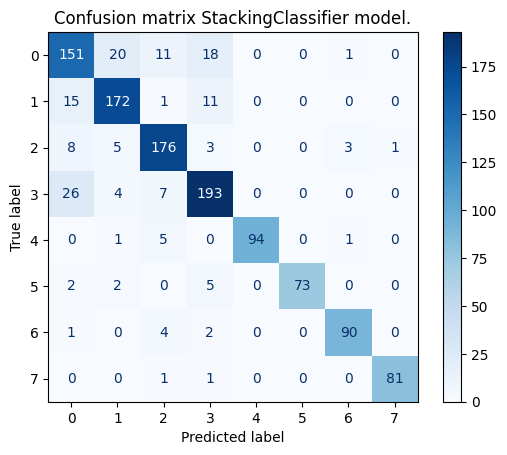

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Cargar el modelo desde el archivo
eclf2 = joblib.load('best_model_stacking.h5')

# Realizar predicciones en los datos de prueba
yp = eclf2.predict(Xtest)

cm = confusion_matrix(ytest, yp)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix StackingClassifier model.')
plt.show()

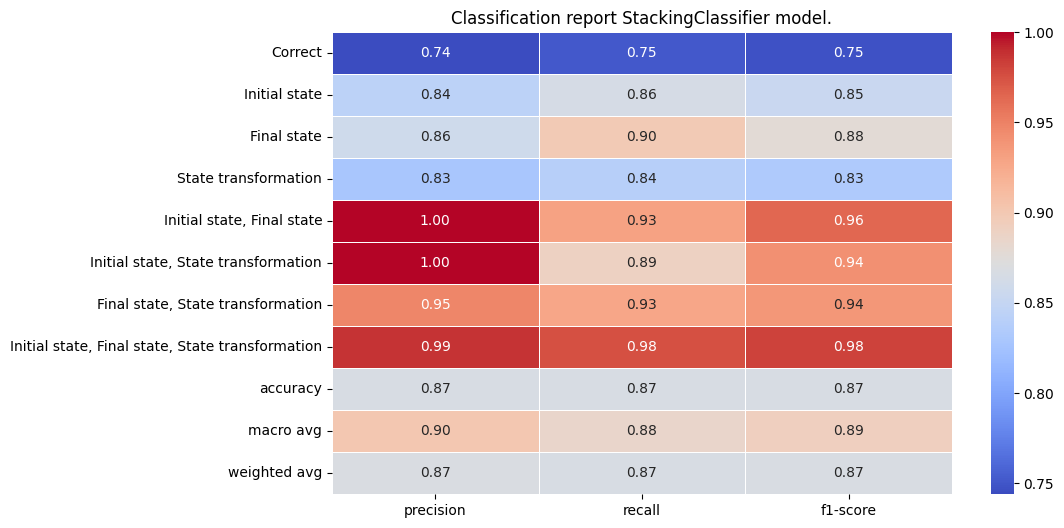

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
import numpy as np

# Supongamos que ya tienes tus datos de clasificación report en 'report'
# report = classification_report(ytest, yp.argmax(axis=1), target_names=category, output_dict=True)
report= classification_report(ytest,yp,target_names=category, output_dict=True)

# Convertir el informe de clasificación en un DataFrame y transponerlo
df_report = pd.DataFrame(report).T

# Eliminar la columna "support"
df_report = df_report.drop('support', axis=1)

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(df_report, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Classification report StackingClassifier model.')
plt.show()

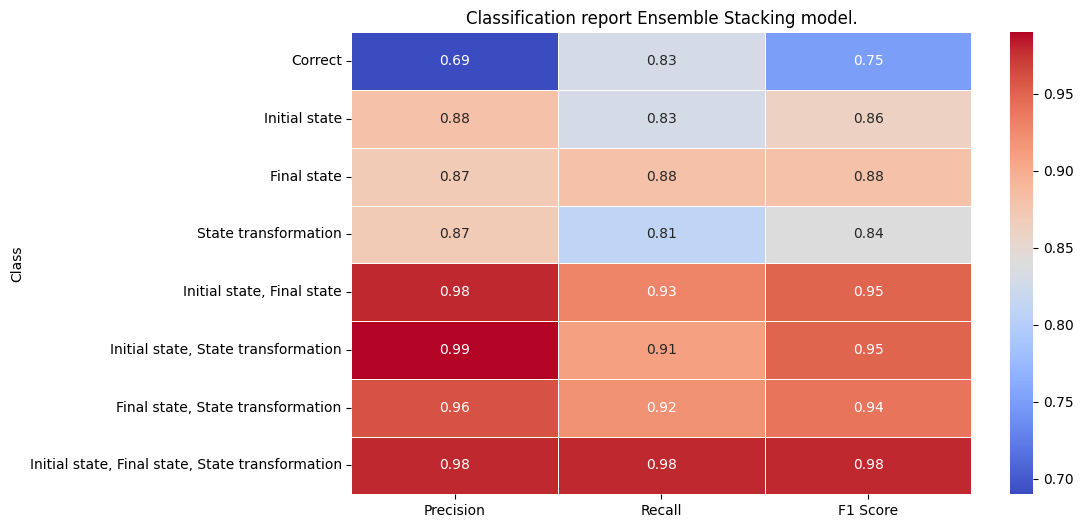

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Definir las etiquetas de las clases y las métricas
class_names = ['Correct', 'Initial state', 'Final state', 'State transformation',
              'Initial state, Final state', 'Initial state, State transformation',
              'Final state, State transformation', 'Initial state, Final state, State transformation']

precision = [0.69, 0.88, 0.87, 0.87, 0.98, 0.99, 0.96, 0.98]
recall = [0.83, 0.83, 0.88, 0.81, 0.93, 0.91, 0.92, 0.98]
f1_score = [0.75, 0.86, 0.88, 0.84, 0.95, 0.95, 0.94, 0.98]

# Crear un DataFrame para los datos
data = {
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
}

df = pd.DataFrame(data)

# Establecer las etiquetas de clase como índice
df.set_index('Class', inplace=True)

# Crear un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Classification report Ensemble Stacking model.')
plt.show()

In [ ]:
yp=eclf1.predict_proba(Xtest)
loss = tf.keras.losses.SparseCategoricalCrossentropy()(ytest, yp)
print("Ensemble 1 Loss",loss.numpy())

Ensemble 1 Loss 0.5293744047080245


In [ ]:
yp=eclf2.predict_proba(Xtest)
loss = tf.keras.losses.SparseCategoricalCrossentropy()(ytest, yp)
print("Ensemble 1 Loss",loss.numpy())

Ensemble 1 Loss 0.42268499222265626


### 2.3. Keras model.

The defined model is a basic artificial neural network (ANN). Specifically, it is a feedforward neural network with multiple dense layers using the Rectified Linear Unit (ReLU) activation function in its neurons. While it is a basic neural network, its performance and learning capacity will depend on factors such as data size, problem complexity, and the appropriate choice of hyperparameters and architecture.

#### 2.3.1. Model architecture.

In [ ]:
import keras

model = keras.Sequential()
model.add(Input((3840)))

model.add(layers.Dense(10000))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(layers.Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(layers.Dense(100))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(layers.Dense(10))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(layers.Dense(8))
model.add(BatchNormalization())
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10000)             38410000  
                                                                 
 batch_normalization (Batch  (None, 10000)             40000     
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 10000)             0         
                                                                 
 dropout (Dropout)           (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 1000)              10001000  
                                                                 
 batch_normalization_1 (Bat  (None, 1000)              4000      
 chNormalization)                                       

#### 2.3.2. Compile the model.

For the compilation of the model, the Learning_rate is included beforehand, which is the percentage of change with which the weights are updated in each iteration, in other words, each iteration is carried out in the training process, the weights of the training must be updated. input to be able to give each time a better approximation.

In [ ]:
adam = Adam(learning_rate=0.00001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

#### 2.3.3. Model training.

Epochs are defined, which refers to the number of times the model sees the entire data set.

In [ ]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=200)
mc = ModelCheckpoint('/content/drive/MyDrive/Generationdata/best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)
history=model.fit(Xtrain,ytrain,batch_size=100,epochs=5000,
          validation_split=0.2,callbacks=[es, mc])

Epoch 1/5000
36/39 [==========================>...] - ETA: 0s - loss: 2.1612 - accuracy: 0.1869

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


39/39 [==============================] - 18s 318ms/step - loss: 2.1456 - accuracy: 0.1911 - val_loss: 2.0547 - val_accuracy: 0.1567
Epoch 2/5000
39/39 [==============================] - 1s 20ms/step - loss: 1.8362 - accuracy: 0.3105 - val_loss: 2.0814 - val_accuracy: 0.0852
Epoch 3/5000
39/39 [==============================] - 1s 19ms/step - loss: 1.6832 - accuracy: 0.3864 - val_loss: 2.0471 - val_accuracy: 0.1304
Epoch 4/5000
39/39 [==============================] - 1s 19ms/step - loss: 1.6000 - accuracy: 0.4524 - val_loss: 2.0066 - val_accuracy: 0.1409
Epoch 5/5000
39/39 [==============================] - 2s 63ms/step - loss: 1.5443 - accuracy: 0.4703 - val_loss: 1.9488 - val_accuracy: 0.1809
Epoch 6/5000
39/39 [==============================] - 3s 73ms/step - loss: 1.5195 - accuracy: 0.4871 - val_loss: 1.8767 - val_accuracy: 0.2313
Epoch 7/5000
39/39 [==============================] - 2s 65ms/step - loss: 1.4853 - accuracy: 0.5187 - val_loss: 1.8085 - val_accuracy: 0.3113
Epoch 8/50

----


#### 2.3.4. Results.

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

In [ ]:
N=len(train_loss)

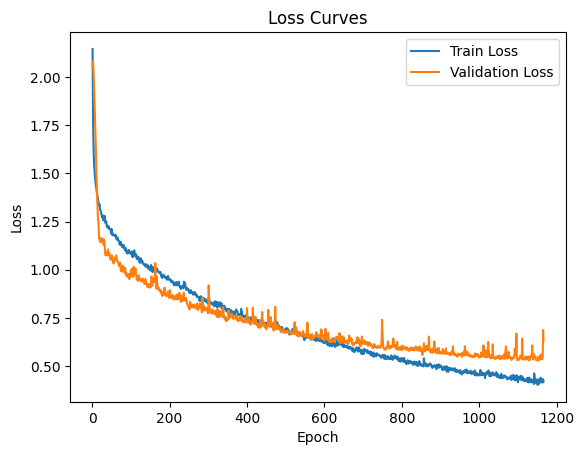

In [ ]:
import matplotlib.pyplot as plt


plt.plot(range(1, N+1), train_loss, label='Train Loss')
plt.plot(range(1, N+1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()


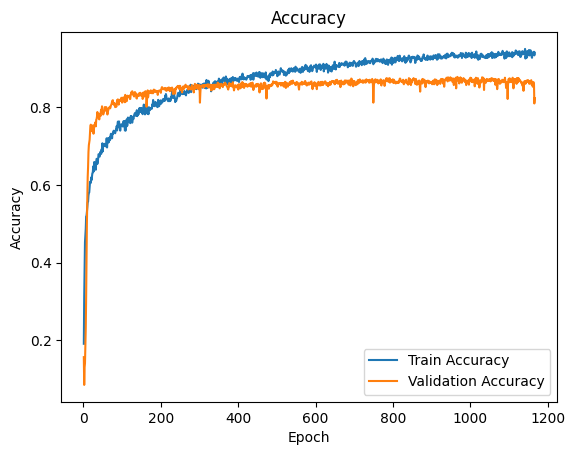

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, N+1), train_accuracy, label='Train Accuracy')
plt.plot(range(1, N+1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

#### 2.3.5. Predict.

In [ ]:
from keras.models import load_model
bestmodel = load_model('/content/drive/MyDrive/Generationdata/best_model.h5')

In [ ]:
yp=bestmodel.predict(Xtest)

38/38 [==============================] - 0s 3ms/step


In [ ]:
yp.argmax(axis=1)

array([1, 1, 0, ..., 7, 0, 7])

In [ ]:
category[yp.argmax(axis=1)]

array(['Initial state', 'Initial state', 'Correct', ...,
       'Initial state, Final state, State transformation', 'Correct',
       'Initial state, Final state, State transformation'], dtype='<U48')

#### 2.3.5.1. Classification report.

The code as a whole uses two matrices, ytest and yp.argmax(axis=1), to compute classification performance metrics such as accuracy, recall, F1-score, and support for each class in the classification problem (8 classes). Then, we print a classification report displaying these metrics for each class, as well as the weighted average of the metrics across all classes.

The classification report is a valuable tool for evaluating the performance of a classification model and understanding how it behaves across different classes. The metrics can provide insights into the model's accuracy and recall in each category, which is particularly useful in multiclass classification problems.

In [ ]:
from sklearn.metrics import classification_report

report= classification_report(ytest,yp.argmax(axis=1),target_names=category)

print(report)

                                                  precision    recall  f1-score   support

                                         Correct       0.72      0.88      0.79       201
                                   Initial state       0.88      0.84      0.86       199
                                     Final state       0.88      0.88      0.88       196
                            State transformation       0.91      0.79      0.84       230
                      Initial state, Final state       0.98      0.94      0.96       101
             Initial state, State transformation       0.94      0.90      0.92        82
               Final state, State transformation       0.93      0.95      0.94        97
Initial state, Final state, State transformation       0.99      0.98      0.98        83

                                        accuracy                           0.88      1189
                                       macro avg       0.90      0.90      0.90      1189
        

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
import numpy as np

# Supongamos que ya tienes tus datos de clasificación report en 'report'
report = classification_report(ytest, yp.argmax(axis=1), target_names=category, output_dict=True)

# Convertir el informe de clasificación en un DataFrame y transponerlo
df_report = pd.DataFrame(report).T

# Eliminar la columna "support"
df_report = df_report.drop('support', axis=1)

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(df_report, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Classification report keras basic model.')
plt.show()

NameError: ignored

#### 2.3.5.2. Confusion matrix.



This code calculates and visualizes the confusion matrix of a classification model to assess how the model is making predictions in each class. The visualization of the confusion matrix provides information about false positives, false negatives, and correct classifications in each class, which is useful for evaluating the model's performance.

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(ytest, yp.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix keras basic model.')
plt.show()

NameError: ignored

### 2.4. Conv1D

This code defines a convolutional neural network with three blocks of convolution and max-pooling followed by fully connected layers for the classification of programming tasks with loops into 8 different classes. Batch normalization and dropout are used to regularize the network and prevent overfitting.

#### 2.4.1. Dimenssions.

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

# Samples in train dataset
N = Xtrain.shape[0]
# Features in train dataset
m  = Xtrain.shape[1]
# feature is represented by 1 number
d = 1

X_train = Xtrain.reshape(N,m,d)

# Samples in train dataset
Nt = Xtest.shape[0]
# Features in train dataset
mt  = Xtest.shape[1]


X_test = Xtest.reshape(Nt,mt,d)

In [ ]:
Xtrain.shape, X_train.shape, Xtest.shape, X_test.shape

((4755, 3840), (4755, 3840, 1), (1189, 3840), (1189, 3840, 1))

In [ ]:
X_train[0].shape

(3840, 1)

#### 2.4.2. Model architecture.

In [ ]:
model2 = keras.Sequential()
model2.add(Input((m,d)))

# Capa de convolución 1D
model2.add(Conv1D(filters=32, kernel_size=3))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
# Capa de max pooling
model2.add(MaxPooling1D(pool_size=2))

# Capa de convolución 1D
model2.add(Conv1D(filters=64, kernel_size=3))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.2))

# Capa de max pooling
model2.add(MaxPooling1D(pool_size=2))

# Capa de convolución 1D
model2.add(Conv1D(filters=128, kernel_size=3))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.2))

# Capa de max pooling
model2.add(MaxPooling1D(pool_size=2))

# Aplanar la salida para la capa fully connected
model2.add(Flatten())

# Capa fully connected
model2.add(layers.Dense(1000))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.2))

model2.add(layers.Dense(100))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.2))


model2.add(layers.Dense(8))
model2.add(BatchNormalization())
model2.add(Activation('softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3838, 32)          128       
                                                                 
 batch_normalization_5 (Bat  (None, 3838, 32)          128       
 chNormalization)                                                
                                                                 
 activation_5 (Activation)   (None, 3838, 32)          0         
                                                                 
 dropout_4 (Dropout)         (None, 3838, 32)          0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 1919, 32)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1917, 64)         

#### 2.4.3. Compile the model.

In [ ]:
adam = Adam(learning_rate=0.00001)
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

#### 2.4.4. Model training.

In [ ]:
from keras.models import load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=200)
mc = ModelCheckpoint('/content/drive/MyDrive/Generationdata/best_modelConv.h5', monitor='val_accuracy', mode='max', save_best_only=True)
history=model2.fit(X_train,ytrain,batch_size=64,epochs=5000,
          validation_split=0.2,callbacks=[es, mc])

Epoch 1/5000
60/60 [==============================] - ETA: 0s - loss: 2.3754 - accuracy: 0.1441

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


60/60 [==============================] - 22s 195ms/step - loss: 2.3754 - accuracy: 0.1441 - val_loss: 2.1201 - val_accuracy: 0.1199
Epoch 2/5000
60/60 [==============================] - 3s 55ms/step - loss: 2.1818 - accuracy: 0.2008 - val_loss: 2.3106 - val_accuracy: 0.0726
Epoch 3/5000
60/60 [==============================] - 3s 55ms/step - loss: 2.1027 - accuracy: 0.2211 - val_loss: 2.4736 - val_accuracy: 0.0726
Epoch 4/5000
60/60 [==============================] - 3s 55ms/step - loss: 2.0765 - accuracy: 0.2355 - val_loss: 2.5748 - val_accuracy: 0.0726
Epoch 5/5000
60/60 [==============================] - 3s 55ms/step - loss: 1.9679 - accuracy: 0.2666 - val_loss: 2.5312 - val_accuracy: 0.0726
Epoch 6/5000
60/60 [==============================] - 3s 55ms/step - loss: 1.9159 - accuracy: 0.2886 - val_loss: 2.4142 - val_accuracy: 0.0736
Epoch 7/5000
60/60 [==============================] - 3s 55ms/step - loss: 1.8773 - accuracy: 0.3031 - val_loss: 2.2968 - val_accuracy: 0.0778
Epoch 8/50

#### 2.4.5. Results.

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

In [ ]:
N=len(train_loss)

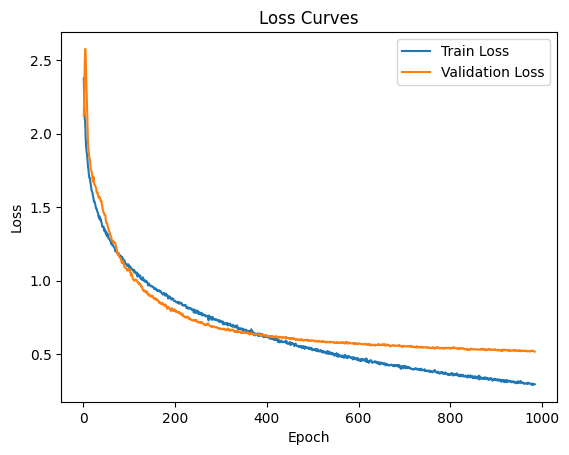

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, N+1), train_loss, label='Train Loss')
plt.plot(range(1, N+1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

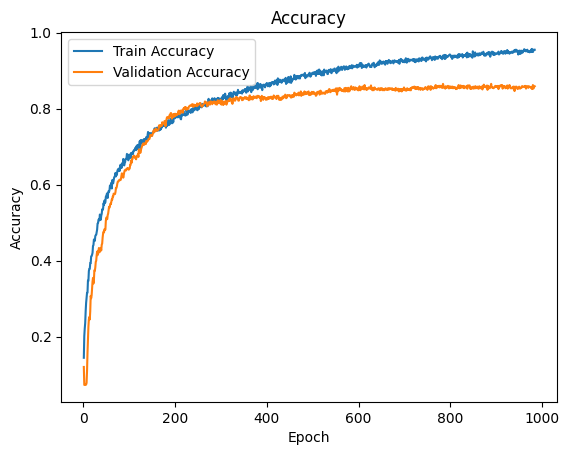

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, N+1), train_accuracy, label='Train Accuracy')
plt.plot(range(1, N+1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

#### 2.4.6. Predict.

In [ ]:
from keras.models import load_model
bestmodel = load_model("/content/drive/MyDrive/Generationdata/best_modelConv.h5")

In [ ]:
yp=bestmodel.predict(Xtest)

38/38 [==============================] - 0s 7ms/step


In [ ]:
yp.argmax(axis=1)

array([1, 1, 0, ..., 7, 0, 7])

In [ ]:
category[yp.argmax(axis=1)]

array(['Initial state', 'Initial state', 'Correct', ...,
       'Initial state, Final state, State transformation', 'Correct',
       'Initial state, Final state, State transformation'], dtype='<U48')

#### 2.4.6.1. Classification report.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytest,yp.argmax(axis=1),target_names=category))

                                                  precision    recall  f1-score   support

                                         Correct       0.68      0.82      0.75       201
                                   Initial state       0.91      0.81      0.86       199
                                     Final state       0.89      0.87      0.88       196
                            State transformation       0.80      0.80      0.80       230
                      Initial state, Final state       1.00      0.93      0.96       101
             Initial state, State transformation       0.97      0.89      0.93        82
               Final state, State transformation       0.97      0.93      0.95        97
Initial state, Final state, State transformation       0.91      0.98      0.94        83

                                        accuracy                           0.86      1189
                                       macro avg       0.89      0.88      0.88      1189
        

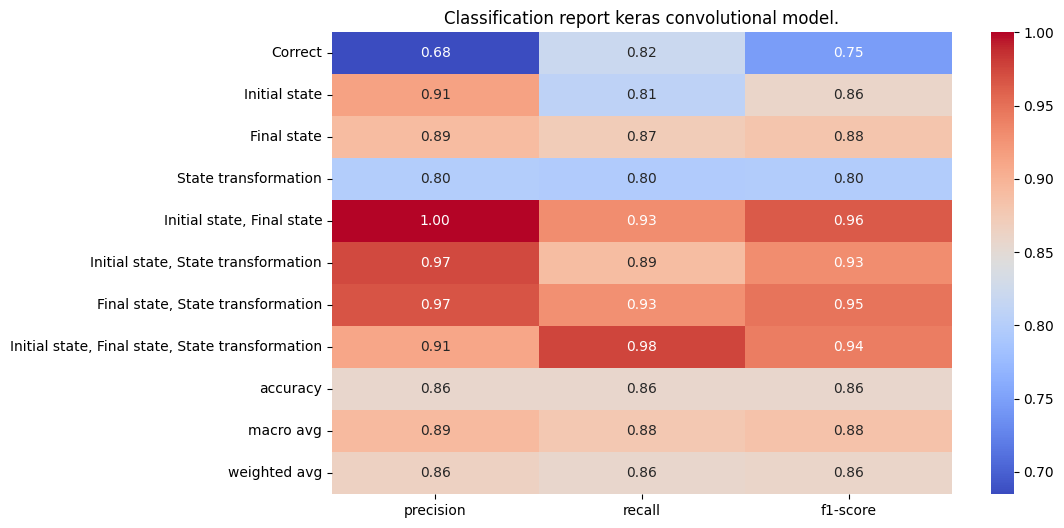

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
import numpy as np

# Supongamos que ya tienes tus datos de clasificación report en 'report'
report2 = classification_report(ytest, yp.argmax(axis=1), target_names=category, output_dict=True)

# Convertir el informe de clasificación en un DataFrame y transponerlo
df_report = pd.DataFrame(report2).T

# Eliminar la columna "support"
df_report = df_report.drop('support', axis=1)

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(df_report, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Classification report keras convolutional model.')
plt.show()

#### 2.4.6.2. Confusion matrix.

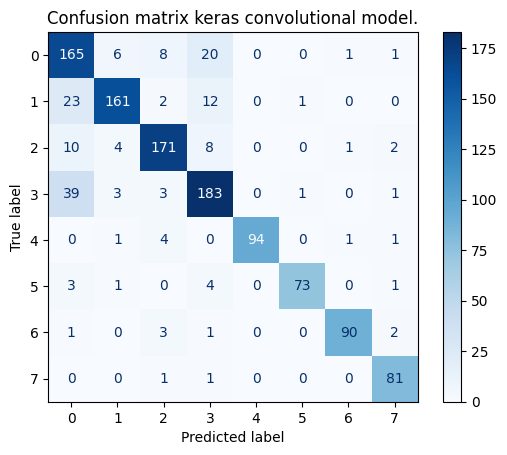

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(ytest, yp.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix keras convolutional model.')
plt.show()

In [ ]:
# from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hacer predicciones con ambos modelos
rf_predictions = rf.predict(Xtest)
dl_predictions = model.predict(Xtest)
dl_predictions = np.argmax(dl_predictions, axis=1)  # Convertir las probabilidades en etiquetas

# Combinar las predicciones utilizando un promedio simple
ensemble_predictions = (rf_predictions + dl_predictions) / 2

# Evaluar el ensemble
ensemble_accuracy = accuracy_score(ytest, ensemble_predictions.round())
print("Exactitud del Ensemble:", ensemble_accuracy)

38/38 [==============================] - 0s 3ms/step
Exactitud del Ensemble: 0.8200168208578638


In [ ]:
precision = precision_score(ytest, ensemble_predictions.round(), average='macro')
recall = recall_score(ytest, ensemble_predictions.round(), average='macro')
f1 = f1_score(ytest, ensemble_predictions.round(), average='macro')

print("Precisión del Ensemble:", precision)
print("Recall del Ensemble:", recall)
print("Puntuación F1 del Ensemble:", f1)

Precisión del Ensemble: 0.8672203123116234
Recall del Ensemble: 0.8466914884899848
Puntuación F1 del Ensemble: 0.8532919508872046


In [ ]:
# from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Hacer predicciones con ambos modelos
rf_predictions = rf.predict(Xtest)
dl_predictions = model2.predict(Xtest)
dl_predictions = np.argmax(dl_predictions, axis=1)  # Convertir las probabilidades en etiquetas

# Combinar las predicciones utilizando un promedio simple
ensemble_predictions = (rf_predictions + dl_predictions) / 2

# Evaluar el ensemble
ensemble_accuracy = accuracy_score(ytest, ensemble_predictions.round())
print("Exactitud del Ensemble:", ensemble_accuracy)

38/38 [==============================] - 0s 7ms/step
Exactitud del Ensemble: 0.8267451640033642


In [ ]:
precision = precision_score(ytest, ensemble_predictions.round(), average='macro')
recall = recall_score(ytest, ensemble_predictions.round(), average='macro')
f1 = f1_score(ytest, ensemble_predictions.round(), average='macro')

print("Precisión del Ensemble:", precision)
print("Recall del Ensemble:", recall)
print("Puntuación F1 del Ensemble:", f1)

Precisión del Ensemble: 0.8688544036111493
Recall del Ensemble: 0.851608947897057
Puntuación F1 del Ensemble: 0.856916584249515


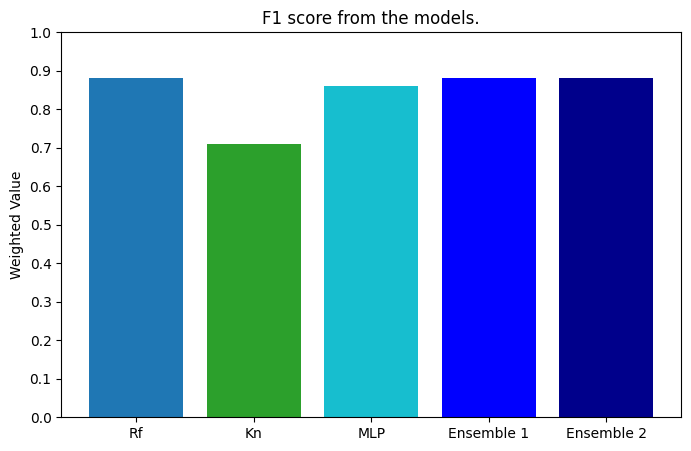

In [ ]:
import matplotlib.pyplot as plt

# Valores ponderados en formato decimal (cambia estos valores según tu informe de clasificación)
accuracy_rf = 0.88
accuracy_kn = 0.71
accuracy_mlp = 0.86
accuracy_ensemble1 = 0.88
accuracy_ensemble2 = 0.88

# Etiquetas para las métricas
metrics = ['Rf', 'Kn', 'MLP', 'Ensemble 1', 'Ensemble 2']

# Valores correspondientes a las métricas
values = [accuracy_rf, accuracy_kn, accuracy_mlp, accuracy_ensemble1, accuracy_ensemble2]

# Colores personalizados en tonos de azul
colors = ['#1f77b4', '#2ca02c', '#17becf', '#0000FF', '#00008B']

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=colors)
plt.ylabel('Weighted Value')
plt.title('F1 score from the models.')

# Establecer el rango del eje y de 0 a 1 con un incremento de uno en uno
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

plt.show()
